In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap  
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
  
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

In [2]:
# Importação dos dados e pré-processamento

In [3]:
# Este dataset foi baixado de https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-indonesia
dataset = './heart_attack_prediction_indonesia.csv' 
df = pd.read_csv(dataset, delimiter=',', encoding='ascii') # Lê o dataset do CSV para um DataFrame

df.info() # Para verificar os tipos das colunas

df['Blood Pressure Mean'] = (df['Blood Pressure Mean'].str.replace(',', '.', regex=False).astype(float)) # converte para float trocando a vírgula por ponto

print(df.isnull().sum()) # Verifica nulos
print(df.duplicated().sum()) # Verifica duplicados

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      158355 non-null  int64 
 1   Sex                      158355 non-null  object
 2   Cholesterol              158355 non-null  int64 
 3   Triglycerides            158355 non-null  int64 
 4   Systolic                 158355 non-null  int64 
 5   Diastolic                158355 non-null  int64 
 6   Blood Pressure Mean      158355 non-null  object
 7   Diet                     158355 non-null  object
 8   Diabetes                 158355 non-null  int64 
 9   Family History           158355 non-null  int64 
 10  Smoking                  158355 non-null  int64 
 11  Obesity                  158355 non-null  int64 
 12  Alcohol Consumption      158355 non-null  int64 
 13  Previous Heart Problems  158355 non-null  int64 
 14  Heart Attack Risk   

,Age,Sex,Cholesterol,Triglycerides,Systolic,Diastolic,Blood Pressure Mean,Diet,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Heart Attack Risk
0,60,Male,211,101,113,62,79.00,Unhealthy,1,0,0,0,0,0,0
1,53,Female,208,138,132,76,94.67,Healthy,0,1,1,0,0,1,0
2,62,Female,231,171,116,74,88.00,Healthy,0,1,1,1,1,0,1
3,73,Male,202,146,136,65,88.67,Unhealthy,0,1,0,0,1,0,0
4,52,Male,232,139,127,75,92.33,Unhealthy,0,0,1,0,1,1,1


In [4]:
# Análise exploratória

In [5]:
df.describe()

# Perguntas
# 1- Qual a distribuição de chances de ataque cardíaco?
# 2- Qual a relação entre idade, gênero e chances de ataque cardíaco?
# 3- Qual a relação entre colesterol e chances de ataque cardíaco?
# 4- Qual a relação entre diabetes e chances de ataque cardíaco?
# 5- Qual a relação entre triglicerídeos e chances de ataque cardíaco?
# 6- Qual a relação entre pressão e chances de ataque cardíaco?
# 7- Fumar, obesidade e consumo de álcool aumentam as chances de ataque cardíaco?
# 8- Dieta influencia o risco?
# 9- Histórico familiar ou Problemas cardíacos prévios influenciam nas chances de ataque cardíaco?

,Age,Cholesterol,Triglycerides,Systolic,Diastolic,Blood Pressure Mean,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Heart Attack Risk
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,199.533264,149.715885,129.515772,79.490809,96.165787,0.199804,0.300218,0.499965,0.249901,0.401042,0.200575,0.401004
std,11.910897,39.737565,49.023473,15.005641,10.002964,8.326490,0.399854,0.458354,0.500002,0.432957,0.490111,0.400432,0.490103
min,25.000000,100.000000,50.000000,61.000000,37.000000,61.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,172.000000,116.000000,119.000000,73.000000,90.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,199.000000,149.000000,130.000000,80.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,226.000000,183.000000,140.000000,86.000000,101.670000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,90.000000,350.000000,380.000000,199.000000,127.000000,135.330000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


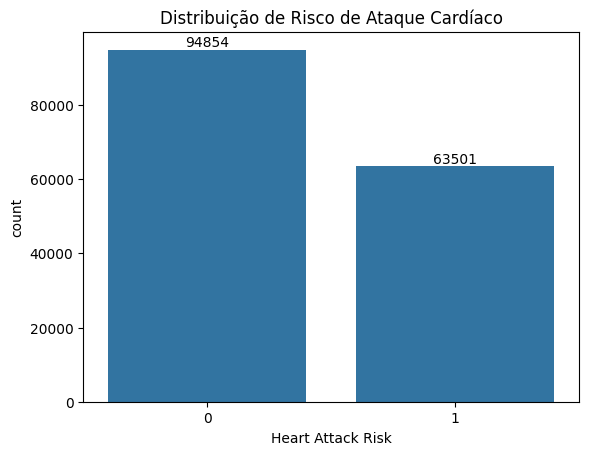

In [6]:
# 1- Qual a distribuição de chances de ataque cardíaco (variável alvo)?
ax = sns.countplot(data=df, x='Heart Attack Risk')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribuição de Risco de Ataque Cardíaco')
plt.show()

In [27]:
# 0 = não há riscos e 1 = há riscos
# Temos o total de pacientes analisados = 158355
# A porcentagem de pacientes sem risco de ataque cardíaco é de 59,9%
# A porcentagem de pacientes com risco de ataque cardíaco é de 40,1%
# 59,9% + 40,1% totaliza os 100%
# Existe um leve desbalanceamento

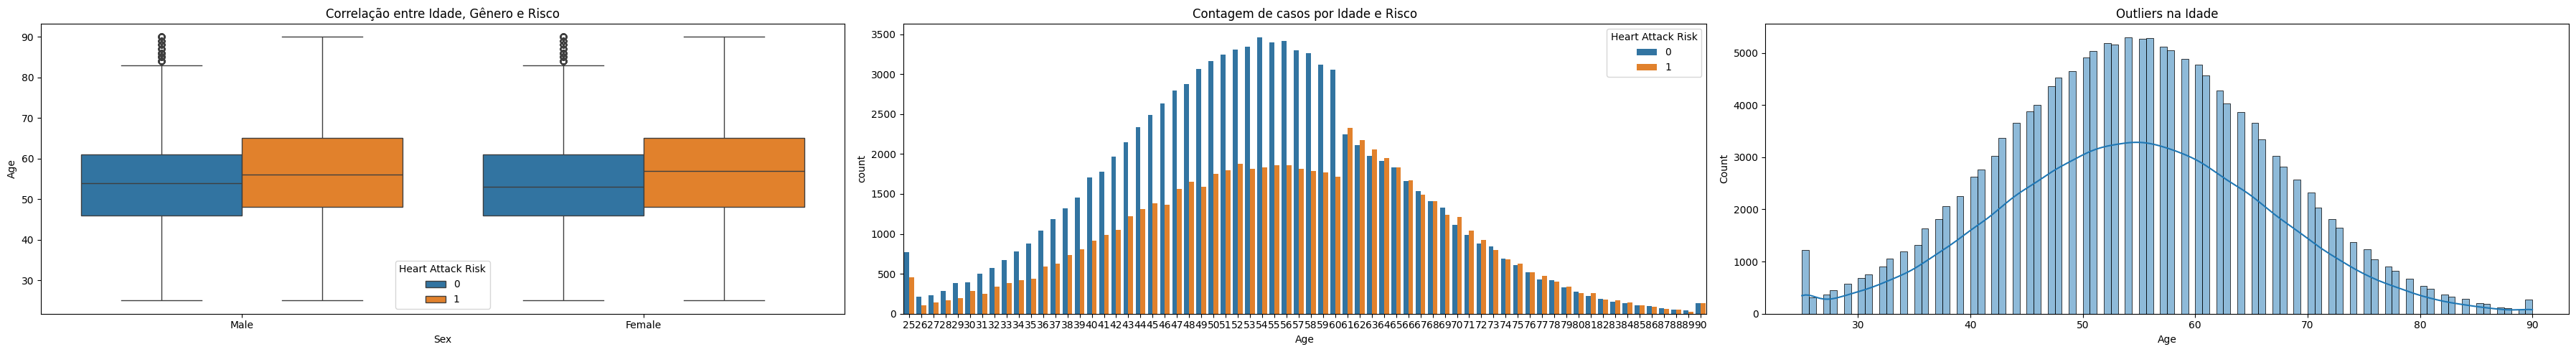

      Sex  total  risco_medio  idade_mediana  idade_mediana_risco  percentual
0  Female  76112         40.3             55                   57        48.1
1    Male  82243         39.9             55                   56        51.9


In [8]:
# 2- Qual a relação entre idade, gênero e chances de ataque cardíaco?

plt.figure(figsize=(36, 5)) 

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Sex', y='Age', hue='Heart Attack Risk')
plt.title('Correlação entre Idade, Gênero e Risco')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Age', hue='Heart Attack Risk')
plt.title('Contagem de casos por Idade e Risco')

plt.subplot(1, 3, 3)
sns.histplot(df['Age'], kde=True)
plt.title('Outliers na Idade')

plt.tight_layout()
plt.show()

# Total de registros
total_registros = len(df)

# Agrupar para calcular métricas gerais
resumo_genero = df.groupby('Sex').agg(
    total=('Sex', 'count'),
    risco_medio=('Heart Attack Risk', 'mean'),
    idade_mediana=('Age', 'median')
).reset_index()

# Calcular a mediana de idade apenas para quem tem risco = 1 (por gênero)
mediana_com_risco = (
    df[df['Heart Attack Risk'] == 1]
    .groupby('Sex')['Age']
    .median()
    .rename('idade_mediana_risco')
    .reset_index()
)

# Juntar as duas tabelas
resumo_genero = resumo_genero.merge(mediana_com_risco, on='Sex', how='left')

# Calcular percentual
resumo_genero['percentual'] = (resumo_genero['total'] / total_registros) * 100

# Arredondar valores
resumo_genero['percentual'] = resumo_genero['percentual'].round(1)
resumo_genero['risco_medio'] = (resumo_genero['risco_medio'] * 100).round(1)
resumo_genero['idade_mediana'] = resumo_genero['idade_mediana'].astype(int)
resumo_genero['idade_mediana_risco'] = resumo_genero['idade_mediana_risco'].astype(int)

print(resumo_genero)

In [9]:
# 0 = não há riscos e 1 = há riscos
# Homens: 51,9% do total — risco médio 39,9%
# Mulheres: 48,1% do total — risco médio 40,3%
# Diferença mínima no risco entre gêneros.
# Mulheres com risco tendem a ser um pouco mais velhas (mediana 57 anos) que os homens com risco (56 anos).
# Sem outliers: mínimo 25 e máximo 90 anos

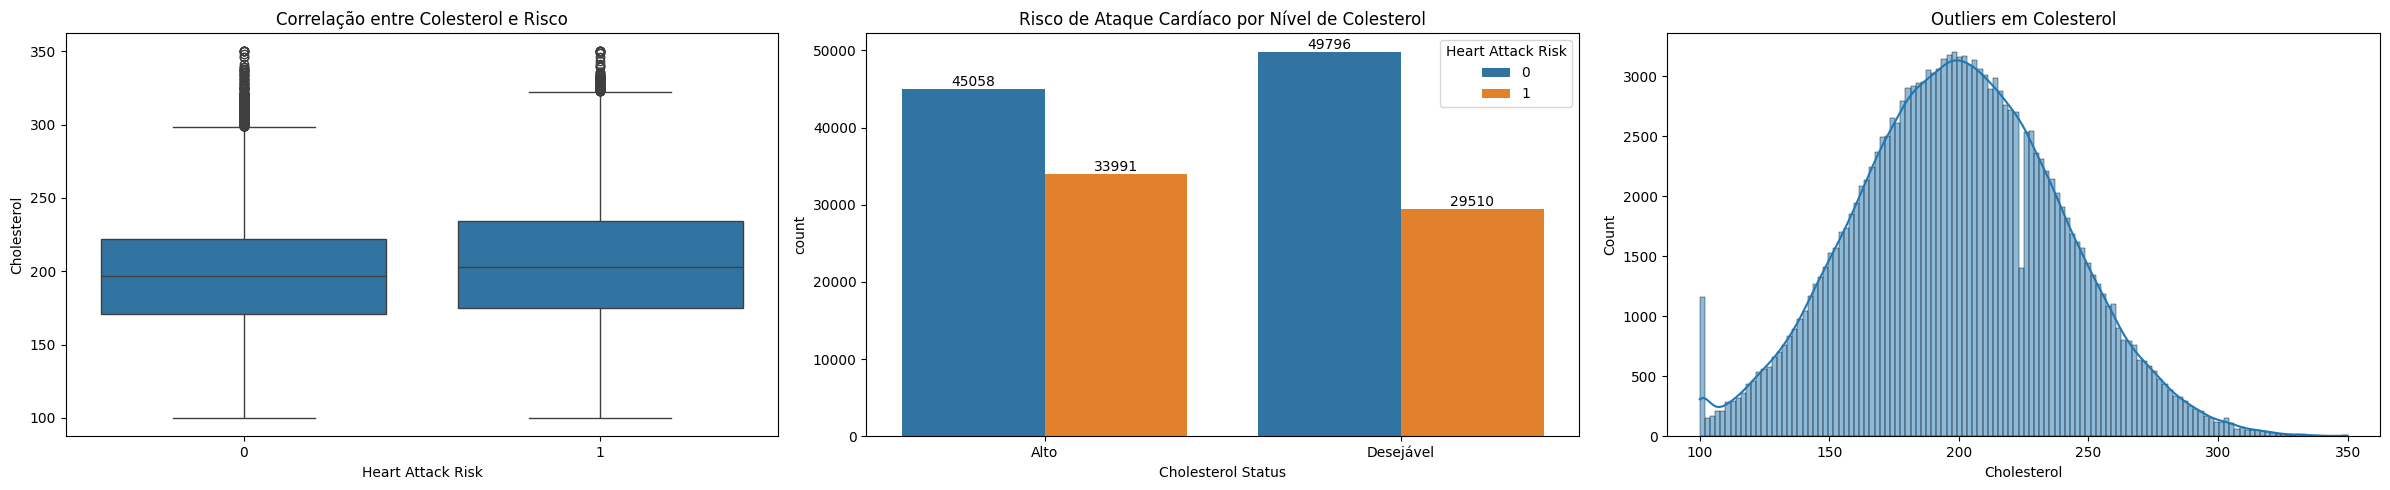

In [10]:
# 3- Qual a relação entre colesterol e chances de ataque cardíaco?
plt.figure(figsize=(24, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Heart Attack Risk', y='Cholesterol')
plt.title('Correlação entre Colesterol e Risco')

plt.subplot(1, 3, 2)
df['Cholesterol Status'] = df['Cholesterol'].apply(lambda x: 'Desejável' if x < 200 else 'Alto') # Agrupando por status de colesterol

ax = sns.countplot(data=df, x='Cholesterol Status', hue='Heart Attack Risk')
plt.title('Risco de Ataque Cardíaco por Nível de Colesterol')

for container in ax.containers: # Adiciona total em cima das barras
    ax.bar_label(container)

plt.subplot(1, 3, 3)
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Outliers em Colesterol')

plt.tight_layout()
plt.show()


In [11]:
# 0 = não há riscos e 1 = há riscos
# Desejável (<200): risco 37,2%
# Alto (>= 200): risco 62,8%
# Colesterol alto aumenta bastante o risco.
# Outlier máximo identificado: 350

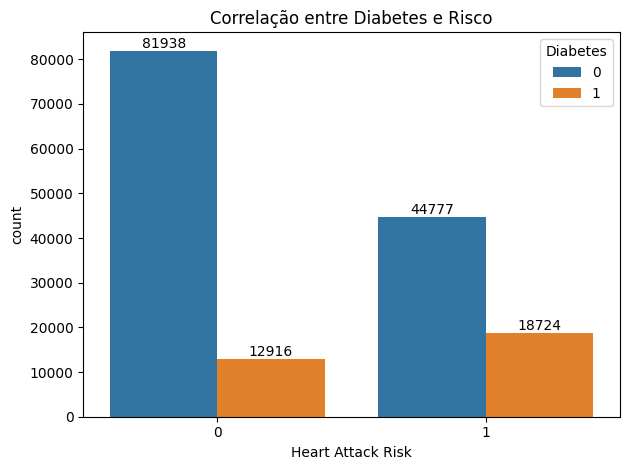

In [12]:
# 4- Qual a relação entre diabetes e chances de ataque cardíaco?
ax = sns.countplot(data=df, x='Heart Attack Risk', hue='Diabetes')
plt.title('Correlação entre Diabetes e Risco')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

In [13]:
# 0 = não há riscos e 1 = há riscos
# Sem diabetes: risco 13,62%
# Com diabetes: risco 29,48%
# Diabetes aumenta bastante o risco

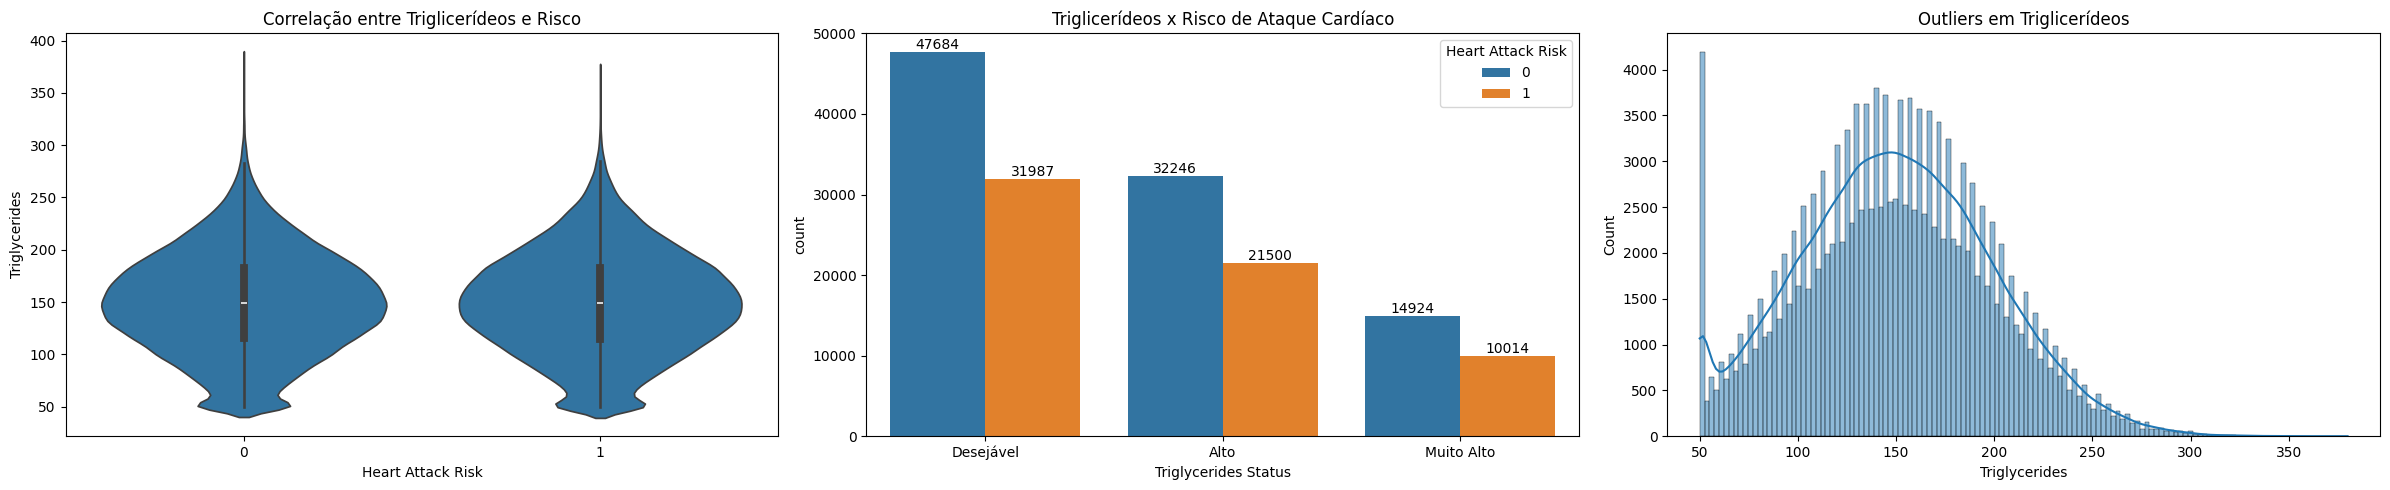

In [14]:
# 5- Qual a relação entre triglicerídeos e chances de ataque cardíaco?
plt.figure(figsize=(24, 5))

plt.subplot(1, 3, 1)
sns.violinplot(data=df, x='Heart Attack Risk', y='Triglycerides', inner='box')
plt.title('Correlação entre Triglicerídeos e Risco')


plt.subplot(1, 3, 2)
def classify_triglycerides(value):
    if value < 150:
        return 'Desejável'
    elif value < 200:
        return 'Alto'
    else:
        return 'Muito Alto'

df['Triglycerides Status'] = df['Triglycerides'].apply(classify_triglycerides) # agrupando por status de triglicerídeos

ax = sns.countplot(data=df, x='Triglycerides Status', hue='Heart Attack Risk')
plt.title('Triglicerídeos x Risco de Ataque Cardíaco')

for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1, 3, 3)
sns.histplot(df['Triglycerides'], kde=True)
plt.title('Outliers em Triglicerídeos')

plt.tight_layout()
plt.show()


In [15]:
# 0 = não há riscos e 1 = há riscos
# Desejável (<150): risco 40,1%
# Alto (150–199): risco 40,0%
# Muito alto (≥200): risco 40,2%
# Triglicerídeos não mudaram o risco de forma relevante
# Outlier máximo encontrado: 380

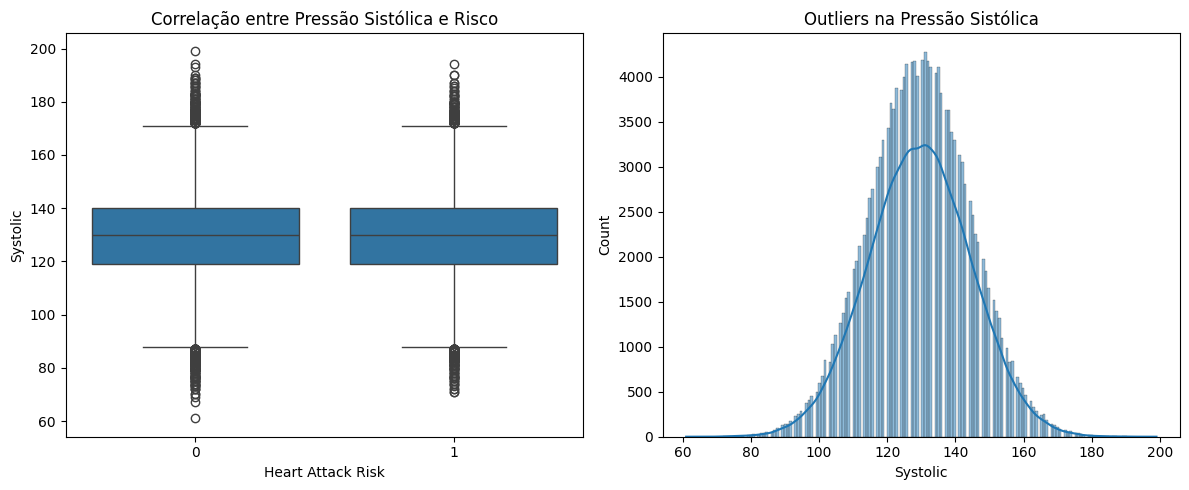

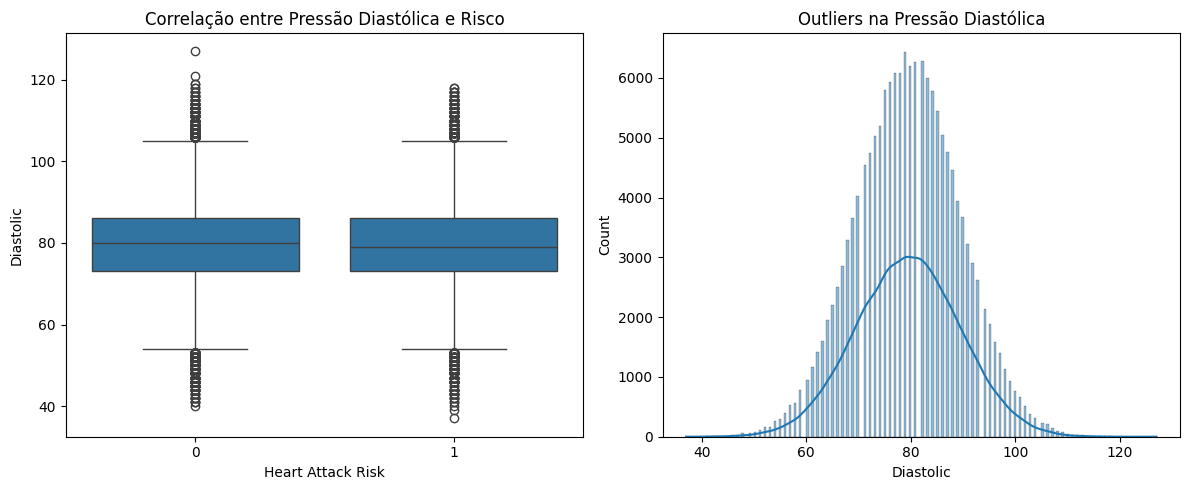

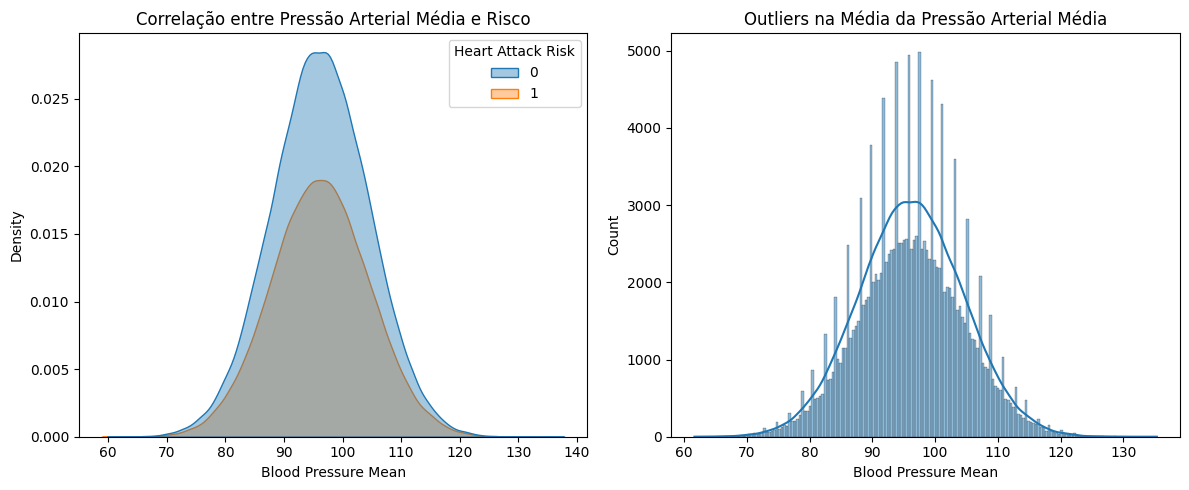

In [16]:
# 6- Qual a relação entre pressão e chances de ataque cardíaco?
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Heart Attack Risk', y='Systolic')
plt.title('Correlação entre Pressão Sistólica e Risco')

plt.subplot(1, 2, 2)
sns.histplot(df['Systolic'], kde=True)
plt.title('Outliers na Pressão Sistólica')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Heart Attack Risk', y='Diastolic')
plt.title('Correlação entre Pressão Diastólica e Risco')

plt.subplot(1, 2, 2)
sns.histplot(df['Diastolic'], kde=True)
plt.title('Outliers na Pressão Diastólica')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Blood Pressure Mean', hue='Heart Attack Risk', fill=True, alpha=0.4)
plt.title('Correlação entre Pressão Arterial Média e Risco')

plt.subplot(1, 2, 2)
sns.histplot(df['Blood Pressure Mean'], kde=True)
plt.title('Outliers na Média da Pressão Arterial Média')

plt.tight_layout()
plt.show()




In [17]:
# 0 = não há riscos e 1 = há riscos
# As distribuições de pressão sistólica e a diastólica são muito semelhantes para pacientes com e sem risco
# A relação entre pressão arterial e risco também é muito próxima entre os grupos
# No geral, pressão arterial e pressão, não são muito relevantes para a análise

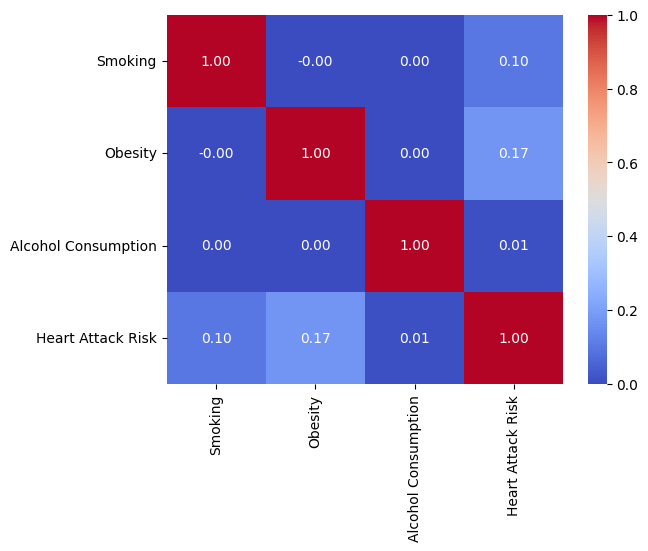

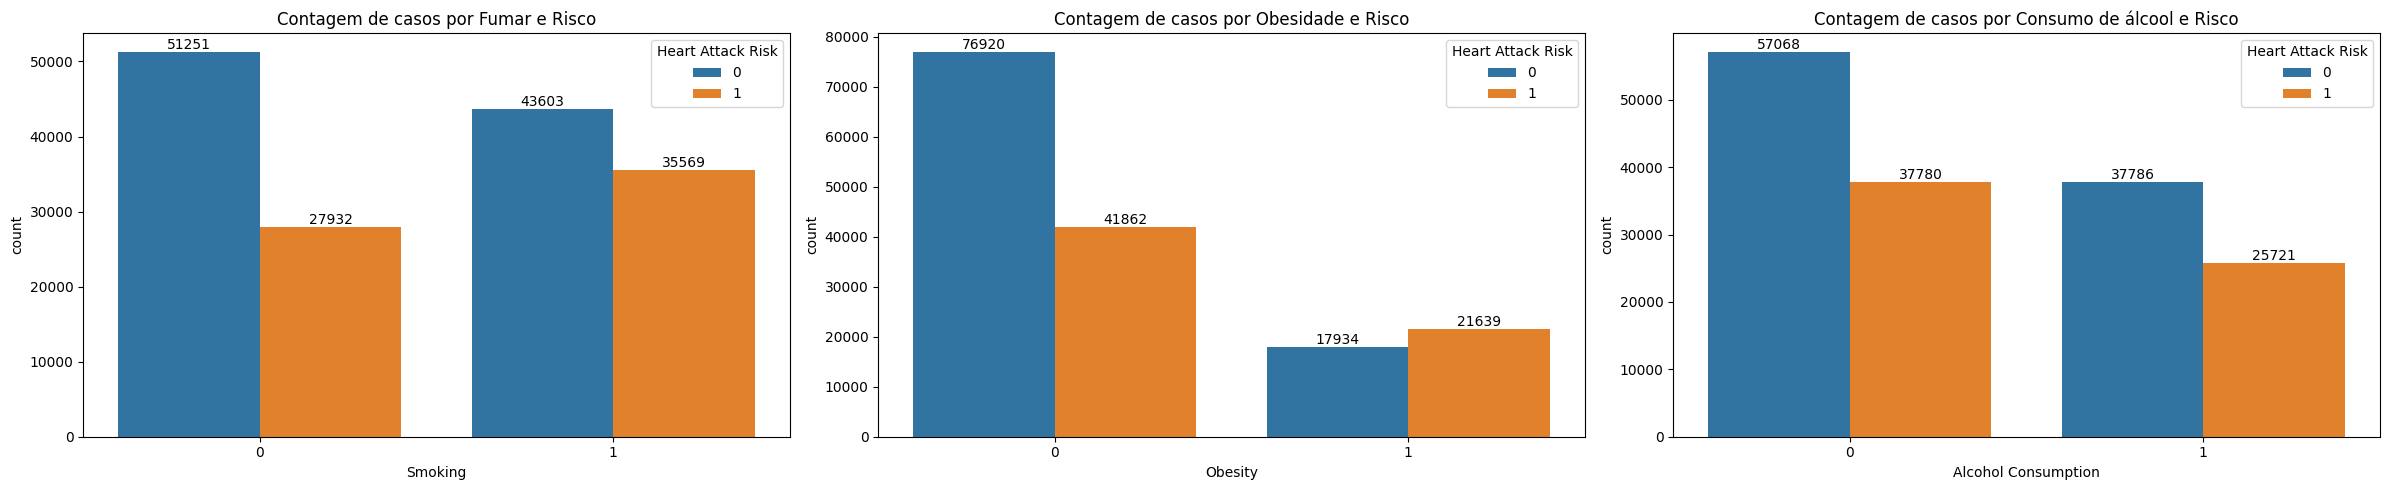

In [18]:
# 7- Fumar, obesidade e consumo de álcool aumentam as chances de ataque cardíaco?
cols = ['Smoking', 'Obesity', 'Alcohol Consumption', 'Heart Attack Risk']
correlation = df[cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.figure(figsize=(24, 5)) 

plt.subplot(1, 3, 1)
ax = sns.countplot(data=df, x='Smoking', hue='Heart Attack Risk')
plt.title('Contagem de casos por Fumar e Risco')

for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1, 3, 2)
ax = sns.countplot(data=df, x='Obesity', hue='Heart Attack Risk')
plt.title('Contagem de casos por Obesidade e Risco')

for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1, 3, 3)
ax = sns.countplot(data=df, x='Alcohol Consumption', hue='Heart Attack Risk')
plt.title('Contagem de casos por Consumo de álcool e Risco')

for container in ax.containers:
    ax.bar_label(container)
    
plt.tight_layout()
plt.show()

In [19]:
# 0 = não há riscos e 1 = há riscos
# Fumantes: risco 44,9% (vs 35,3% em não fumantes)
# Obesidade: risco 54,7% (vs 35,2% em não obesos)
# Álcool: risco muito parecido para quem consome ou não (~40%).
# Fumo e obesidade aumentam o risco, álcool pouco impacto.

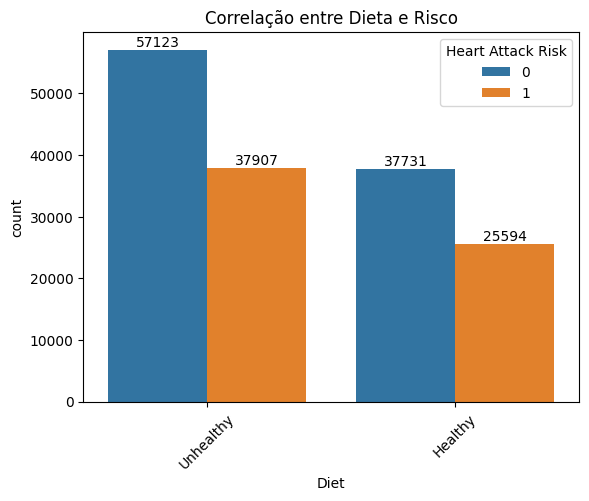

In [20]:
# 8- Dieta influenciam o risco?

ax = sns.countplot(data=df, x='Diet', hue='Heart Attack Risk')
plt.xticks(rotation=45)
plt.title('Correlação entre Dieta e Risco')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [21]:
# 0 = não há riscos e 1 = há riscos
# Dieta saudável: risco 40,4%
# Dieta não saudável: risco 39,9%
# Diferença mínima

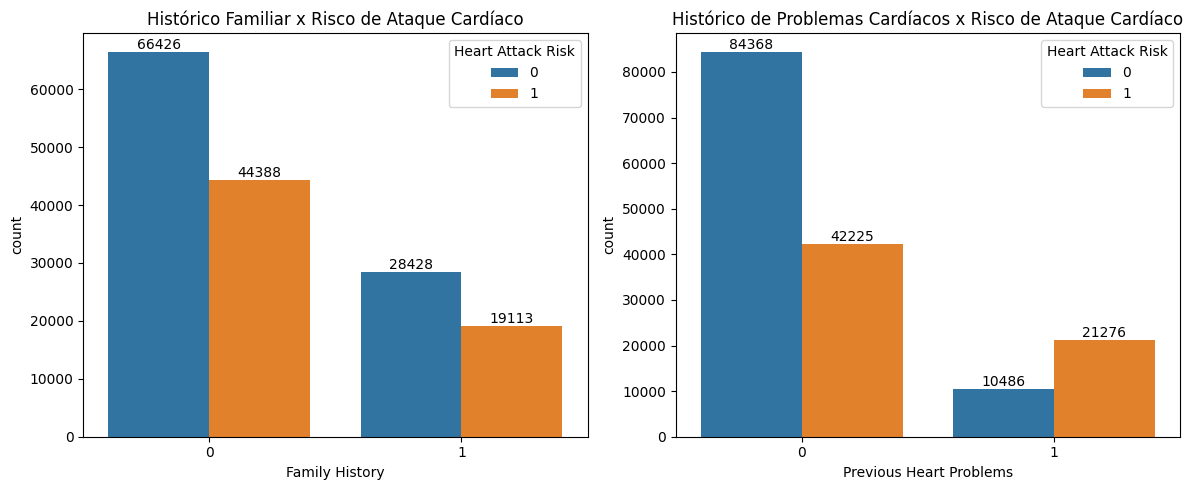

In [22]:
# 9- Histórico familiar ou Problemas cardíacos prévios influenciam nas chances de ataque cardíaco?
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Histórico familiar
ax = sns.countplot(data=df, x='Family History', hue='Heart Attack Risk')
plt.title('Histórico Familiar x Risco de Ataque Cardíaco')

for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1, 2, 2)
# Problemas cardíacos prévios
ax = sns.countplot(data=df, x='Previous Heart Problems', hue='Heart Attack Risk')
plt.title('Histórico de Problemas Cardíacos x Risco de Ataque Cardíaco')

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

In [23]:
# 0 = não há riscos e 1 = há riscos
# Histórico familiar
# Distribuição semelhante para pacientes com e sem histórico familiar
# Não se mostra relevante como fator isolado

# Histórico de problemas carsíacos
# Risco 67% (com) vs 33,4% (sem) → aumenta muito o risco

In [24]:
# Treinamento de modelo de classificação

Regressão Logística
              precision    recall  f1-score   support

           0       0.71      0.82      0.76     18971
           1       0.65      0.50      0.56     12700

    accuracy                           0.69     31671
   macro avg       0.68      0.66      0.66     31671
weighted avg       0.68      0.69      0.68     31671

0.7361725542965081



KNN
              precision    recall  f1-score   support

           0       0.62      0.71      0.66     18971
           1       0.45      0.36      0.40     12700

    accuracy                           0.57     31671
   macro avg       0.54      0.53      0.53     31671
weighted avg       0.55      0.57      0.56     31671

0.5413157712330922



Random Forest
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     18971
           1       0.63      0.51      0.56     12700

    accuracy                           0.68     31671
   macro avg       0.67      0.66      0.66   

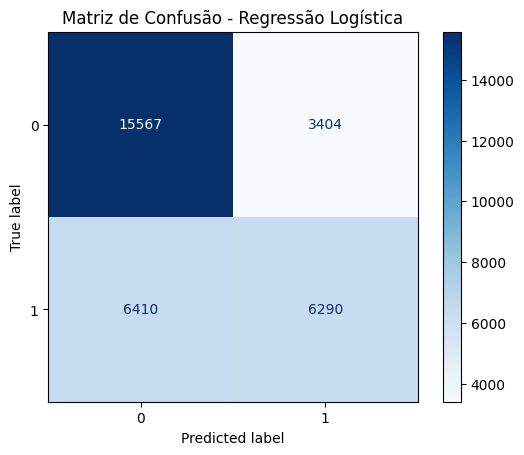

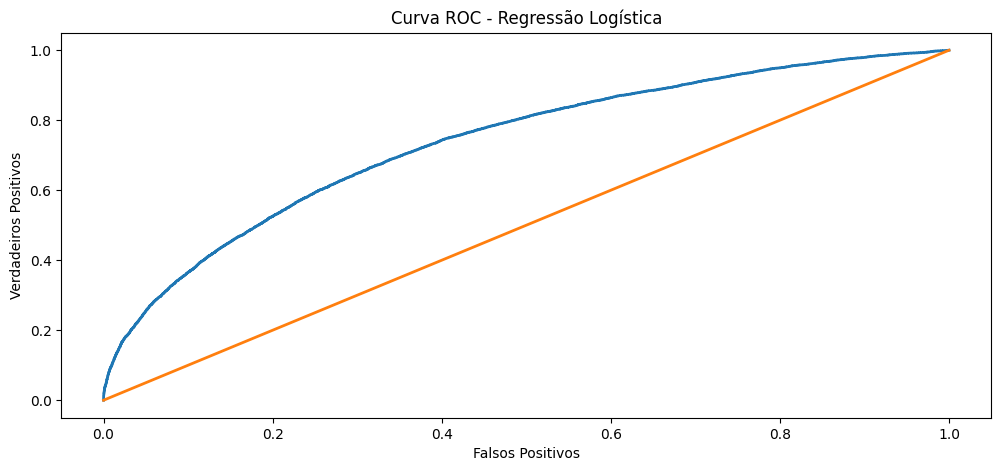

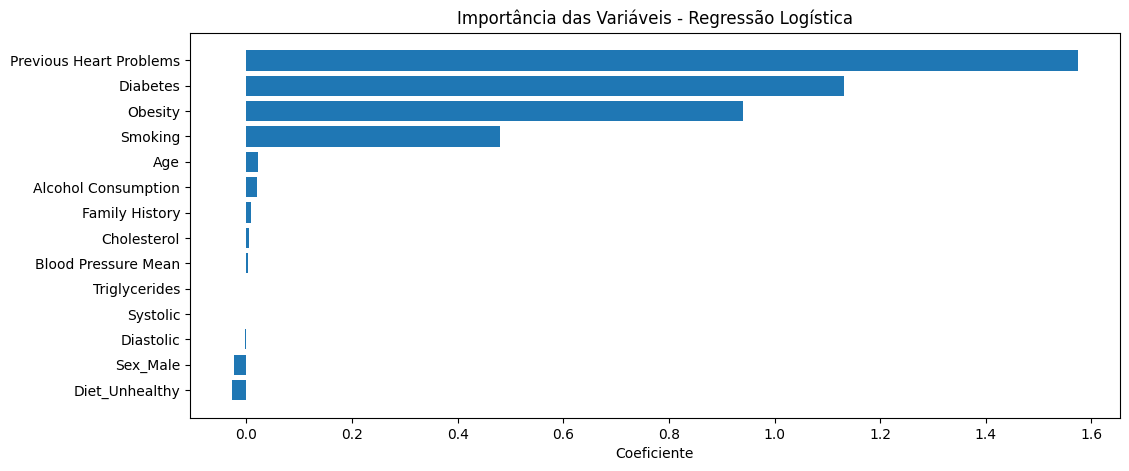

PermutationExplainer explainer: 31672it [06:32, 78.71it/s]                           



Gráfico SHAP - Linear Regression:


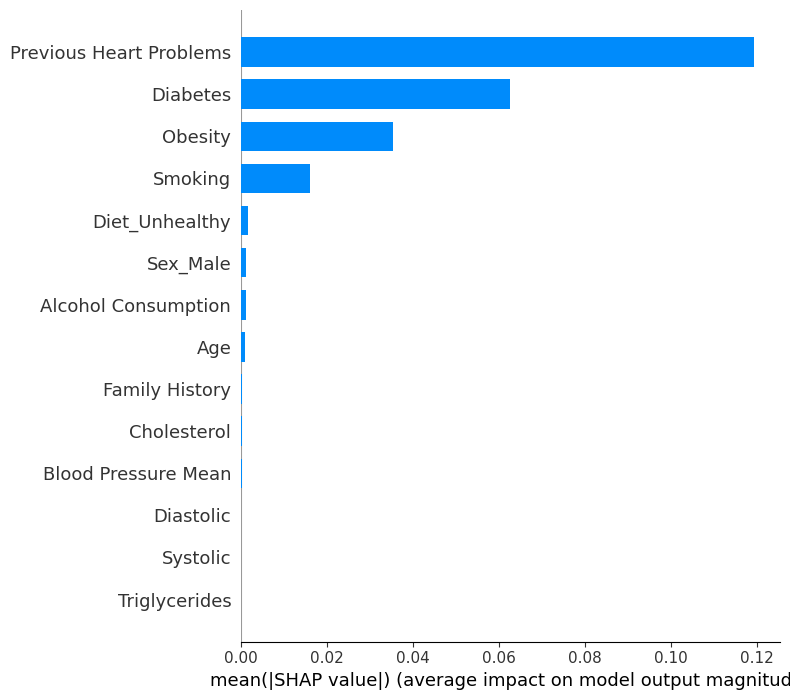

In [29]:
# Lista dos atributos relevantes
relevant_cols = [
    'Age', 'Sex', 'Cholesterol', 'Triglycerides', 'Systolic', 'Diastolic', 'Blood Pressure Mean', 'Diet', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Family History','Previous Heart Problems'
]

# Filtrar apenas as colunas relevantes + alvo
df_model = df[relevant_cols + ['Heart Attack Risk']].copy()

# One-Hot Encoding nas categóricas removendo a categoria de referência (drop_first=True)
X = pd.get_dummies(df_model.drop(columns=['Heart Attack Risk']), drop_first=True)
y = df['Heart Attack Risk']

feature_names = X.columns

# Separa dados em treino e teste; 'stratify=y' mantém a proporção de classes
# 20% da pase para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Cria o escalonador para padronizar variáveis numéricas (média=0, desvio=1)
scaler = StandardScaler()

# Ajustar o scaler só com o treino
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), 
    columns=feature_names
)

# Transformar o teste com o mesmo scaler
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=feature_names
)

# Modelo 1: Regressão Logística -> bastante usado na área da saúde e análises médicas
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Regressão Logística")
print(classification_report(y_test, y_pred, zero_division=0))
print(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

# Modelo 2: KNN -> Boa para comparar pacientes com perfis semelhantes
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("\n\n")
print("KNN")
print(classification_report(y_test, knn.predict(X_test), zero_division=0))
print(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

# Modelo 3: Random Forest -> performa bem no geral
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("\n\n")
print("Random Forest")
print(classification_report(y_test, rf.predict(X_test), zero_division=0))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))



# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

print("\n\n")

# Curva ROC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (área = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], lw=2)
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.show()

print("\n\n")

coef = logreg.coef_[0]
importance = pd.DataFrame({'feature': feature_names, 'coef': coef})
importance = importance.sort_values(by='coef', ascending=False)

plt.figure(figsize=(12, 5))
plt.barh(importance['feature'], importance['coef'])
plt.title("Importância das Variáveis - Regressão Logística")
plt.xlabel("Coeficiente")
plt.gca().invert_yaxis()
plt.show()


X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# 1. Linear Regression SHAP
explainer_lr = shap.Explainer(logreg.predict, X_test_df)
shap_values_lr = explainer_lr(X_test_df)

print("\nGráfico SHAP - Linear Regression:")
shap.summary_plot(shap_values_lr, X_test_df, plot_type="bar")
